In [1]:
# --- Auto-reload packages when code changes (no kernel restart needed) ---
try:
    # For Jupyter/IPython environments
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
    print("🔄 Autoreload enabled: code changes will be auto-reloaded!")
except Exception as e:
    print("⚠️ Could not enable autoreload (not in IPython/Jupyter?):", e)


🔄 Autoreload enabled: code changes will be auto-reloaded!


In [2]:
# Clean solution: Auto-add project root to path
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['image.cmap'] = 'cividis'


# Get the project root (parent directory of examples/)
project_root = os.path.dirname(os.path.abspath('.'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Now import everything cleanly
from DynaSD import GIN, NDD, LiNDDA, MINDD, IMPRINT, WVNT

import numpy as np
import pandas as pd
import scipy as sc

from tests.synthetic_data_generator import SyntheticSeizureGenerator

print("✅ DynaSD imported successfully!")
print(f"📁 Project root: {project_root}")
print(f"🐍 Using Python: {sys.executable}")

# Verify the imports work
print(f"📦 GIN class: {GIN}")
print(f"📦 NDD class: {NDD}")

✅ DynaSD imported successfully!
📁 Project root: /Users/wojemann/Documents/CNT/DynaSD
🐍 Using Python: /Users/wojemann/Documents/CNT/DynaSD/dynasd_env/bin/python
📦 GIN class: <class 'DynaSD.GIN.GIN'>
📦 NDD class: <class 'DynaSD.NDD.NDD'>


In [3]:
fs = 256
generator = SyntheticSeizureGenerator(fs=fs, random_seed=42)

data,sz_start,sz_end = generator.generate_combined_signal(baseline_duration=20, seizure_duration=10, seizure_type='polyspike', n_channels=32, focal_channels=list(range(8)), transition_duration=0)


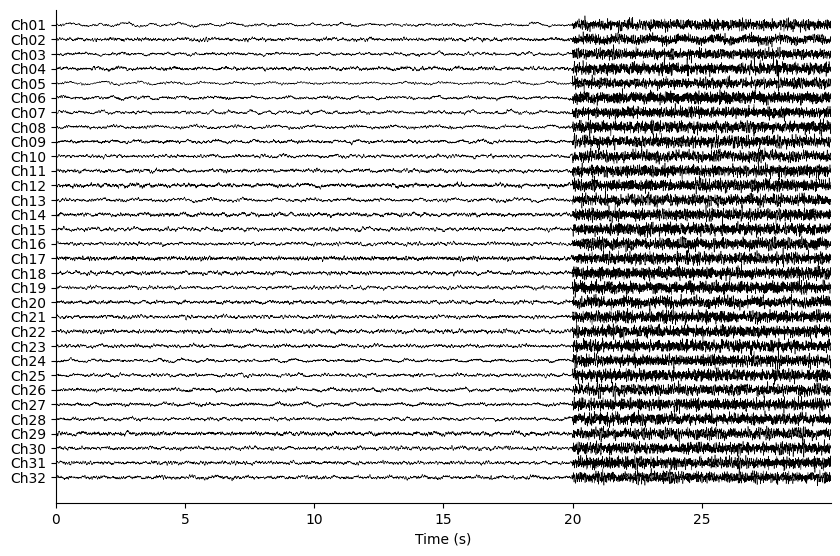

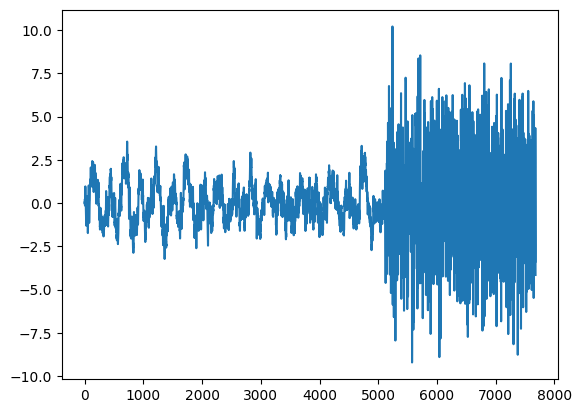

In [4]:
from example_utils import plot_iEEG_data

plot_iEEG_data(data,fs=fs)
plt.show()
plt.plot(data[['Ch01']])
plt.show()

In [18]:
sequence_length = 128
forecast_length = 1
# model = GIN(num_epochs=100,batch_size=32,sequence_length = sequence_length,forecast_length=forecast_length,hidden_size=sequence_length*forecast_length*4,early_stopping=True, num_layers=1,lr=0.0005,w_stride=0.25,w_size=1,patience=3)
# model = LiRNDDA(num_epochs=100,batch_size=32,sequence_length = sequence_length,forecast_length=forecast_length,hidden_size=sequence_length*forecast_length*4,early_stopping=True, num_layers=4,lr=0.0005,w_stride=0.25,w_size=1,patience=3)

model = LiNDDA(num_epochs=200,batch_size=32,sequence_length = sequence_length,forecast_length=forecast_length,early_stopping=True,lr=0.0005,w_stride=0.25,w_size=1)
# model = MINDD(num_epochs=100,batch_size=32,sequence_length = sequence_length,forecast_length=forecast_length,early_stopping=True,lr=0.0005,dropout=0.0,hidden_sizes=[forecast_length*data.shape[1]*2],w_stride=0.25,w_size=1,patience=3)
model.fit(data.iloc[:fs*10,:])

  Model: LinearForecaster_32ch_128seq
  Parameters: 131,104
Training LinearForecaster model:
  Sequence length: 128, Forecast length: 1
  Early stopping: True
Creating 2432 non-overlapping sequences from continuous data
  Created 2432 sequences
  Training sequences: 1946, Validation sequences: 486
Starting training...


Training:  18%|█▊        | 37/200 [00:04<00:17,  9.07it/s, train_loss=0.0147, val_loss=0.1174, patience=5]



Early stopping triggered after 38 epochs
Creating 2432 non-overlapping sequences from continuous data
        Ch01      Ch02      Ch03      Ch04      Ch05      Ch06      Ch07  \
32  0.130603  0.185118  0.142624  0.188557  0.150494  0.148235  0.132915   
33  0.122820  0.192569  0.132662  0.191312  0.157507  0.158797  0.132278   
34  0.123691  0.181547  0.142347  0.180607  0.160613  0.180997  0.136318   
35  0.117759  0.167999  0.146493  0.172444  0.171653  0.172050  0.136684   
36  0.124748  0.165917  0.149583  0.154493  0.168023  0.175164  0.143780   

        Ch08      Ch09      Ch10  ...      Ch23      Ch24      Ch25      Ch26  \
32  0.147689  0.180672  0.182781  ...  0.179674  0.149974  0.190939  0.195987   
33  0.172727  0.184288  0.185654  ...  0.176597  0.163144  0.191100  0.203108   
34  0.159424  0.183160  0.170682  ...  0.170613  0.148448  0.177738  0.183818   
35  0.155153  0.174145  0.173521  ...  0.170452  0.161532  0.172257  0.159933   
36  0.147813  0.177869  0.167603  .

In [23]:
model.dist_params['Ch01']['n']

37

In [20]:
ndd = model(data)
mse = model.mse_df.to_numpy()
prob_times = model.get_win_times(len(data))
onset_idx = np.argmin(np.abs(prob_times-sz_start))//2
mse[onset_idx-5:onset_idx,:]

Creating 7552 non-overlapping sequences from continuous data


array([[0.11775939, 0.16799858, 0.146493  , 0.17244422, 0.17165315,
        0.17205016, 0.13668424, 0.15515268, 0.17414486, 0.17352109,
        0.16628148, 0.20422481, 0.15287738, 0.18089166, 0.17406937,
        0.17747262, 0.22385569, 0.20213225, 0.15881351, 0.22095557,
        0.20042644, 0.17651242, 0.17045213, 0.161532  , 0.17225702,
        0.15993293, 0.17307575, 0.16728655, 0.2087509 , 0.20271167,
        0.14225216, 0.16637887],
       [0.12474792, 0.16591705, 0.1495828 , 0.15449309, 0.16802289,
        0.17516421, 0.14377974, 0.14781314, 0.17786913, 0.16760331,
        0.1694961 , 0.2043826 , 0.14168279, 0.18369758, 0.15607928,
        0.1585135 , 0.24137215, 0.20470771, 0.15290084, 0.2163289 ,
        0.19299369, 0.15767537, 0.15692855, 0.15783249, 0.15780234,
        0.15388207, 0.18329412, 0.16452394, 0.20447527, 0.17877463,
        0.15684937, 0.15346059],
       [0.44234616, 0.72570372, 0.84583265, 0.47793192, 0.51183355,
        0.65774363, 0.32461289, 0.45209742, 0.5839

Creating 7552 non-overlapping sequences from continuous data


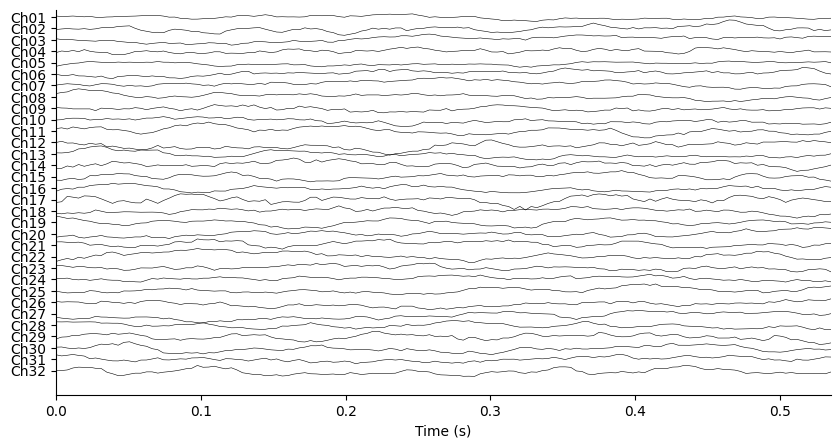

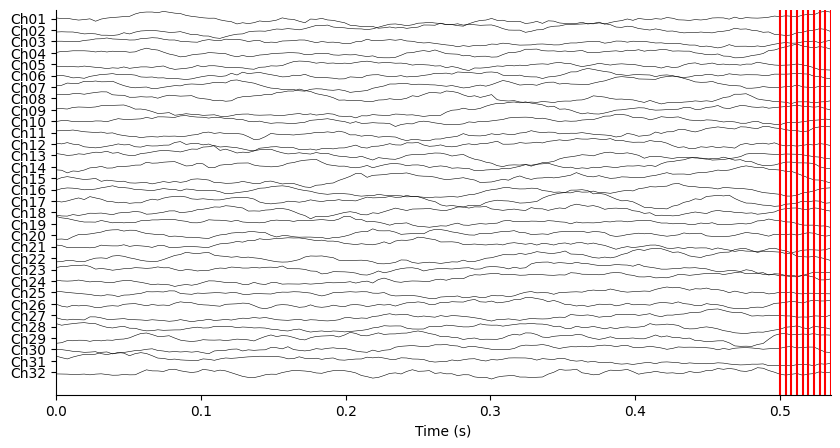

In [8]:
x = model.predict(data.iloc[:,:])
s = 10*fs
length = forecast_length*10 + sequence_length
plot_iEEG_data(data.iloc[s:s+length,:],fs=fs,fig_size=(10,5))
plt.show()
fig,ax = plot_iEEG_data(pd.DataFrame(x,columns=data.columns).iloc[s:s+length,:],fs=fs,fig_size=(10,5))
for v in range(10):
    ax.axvline((v*forecast_length+sequence_length)/fs,color='r')
plt.show()

In [11]:
mse[onset_idx,:]

array([1.03949118, 1.21748078, 1.37043667, 1.09249163, 0.79365641,
       0.70372713, 1.02395082, 0.92531544, 1.47799933, 1.21729493,
       1.44695354, 1.25542283, 0.99367809, 1.04560924, 1.18183601,
       1.48821151, 1.34973896, 1.00257003, 1.15426993, 1.40690601,
       1.07192469, 1.20406294, 1.09878778, 1.2863338 , 0.96519196,
       1.28919232, 0.78350294, 0.85195792, 1.0903666 , 1.38084936,
       1.24636614, 0.85294127])

Creating 7552 non-overlapping sequences from continuous data


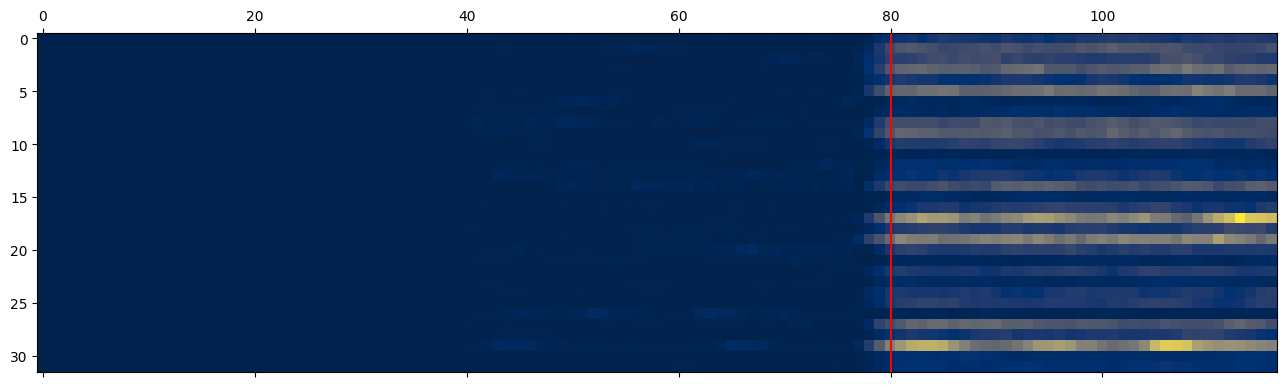

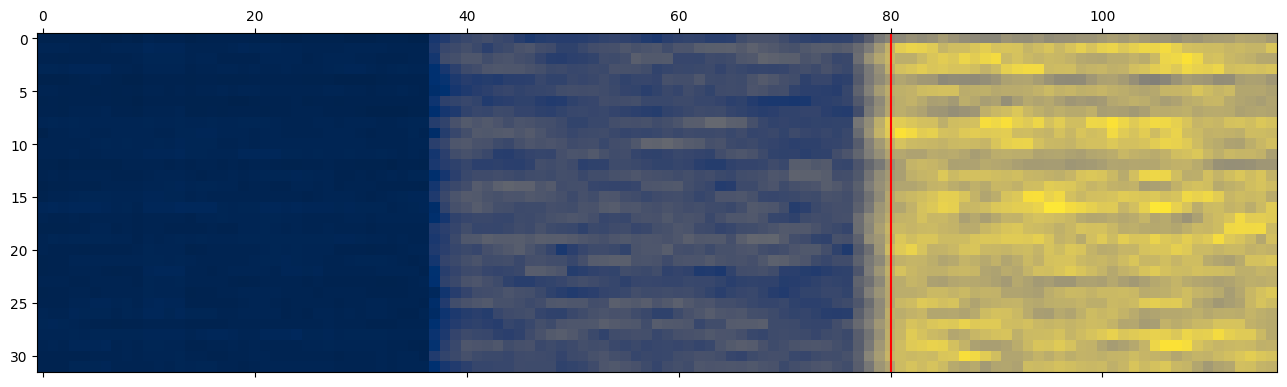

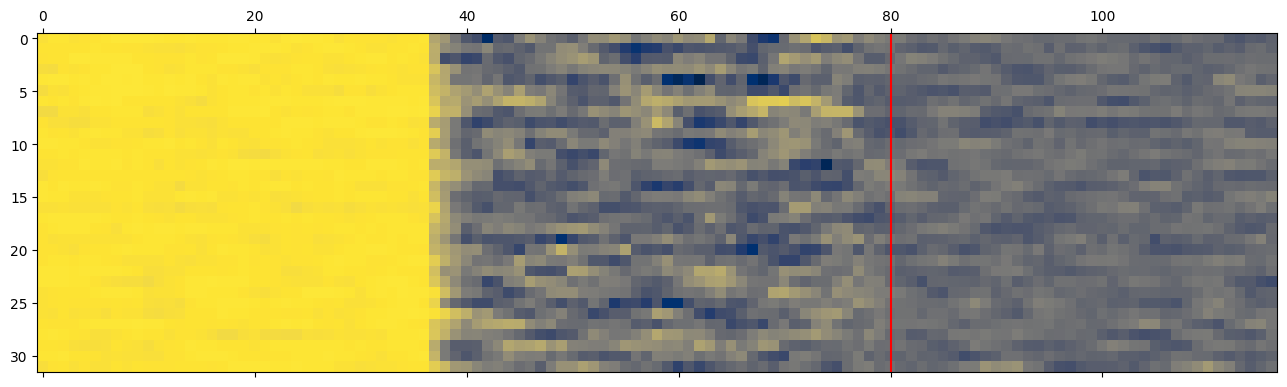

Creating 7552 non-overlapping sequences from continuous data


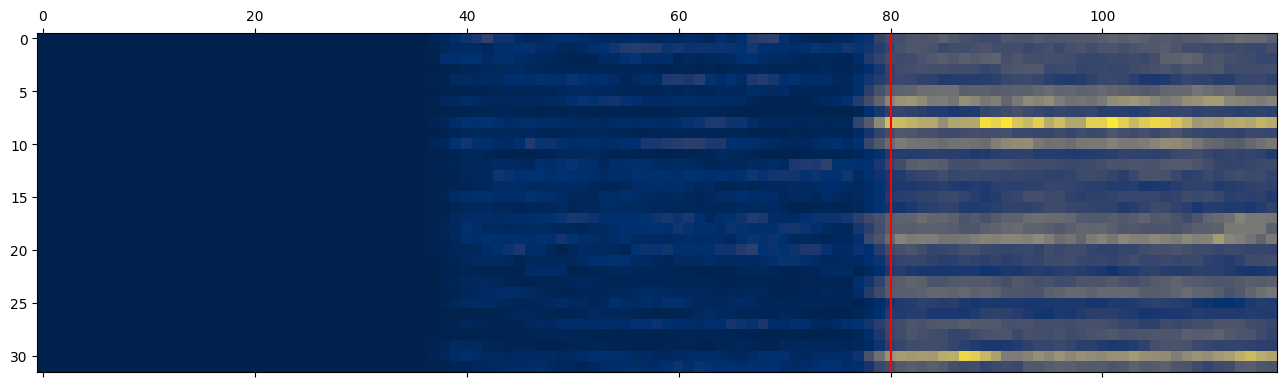

Creating 7552 non-overlapping sequences from continuous data


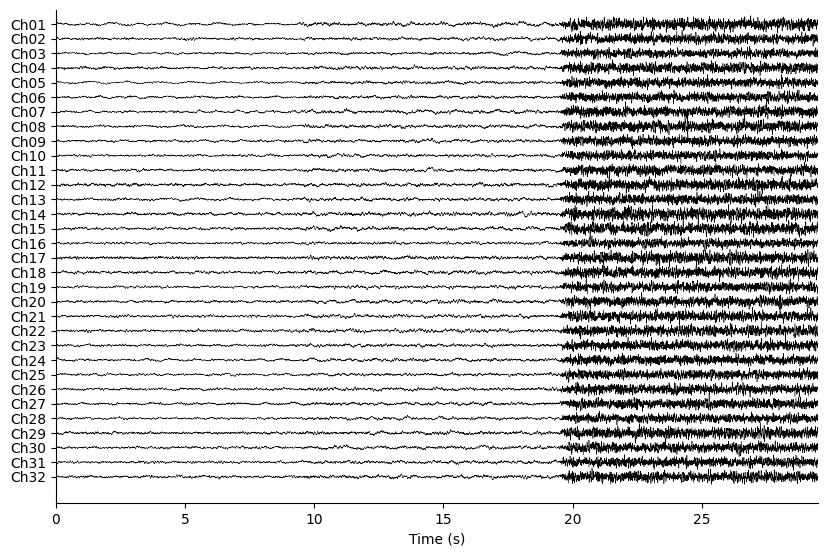

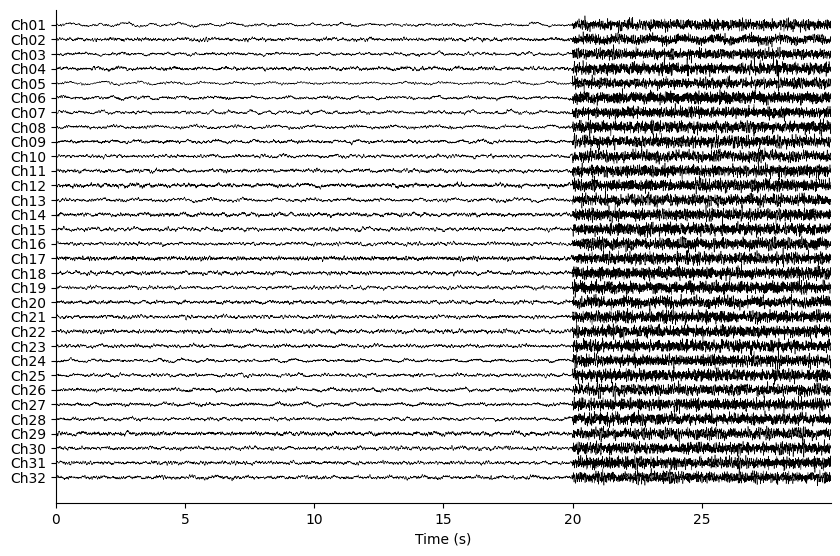

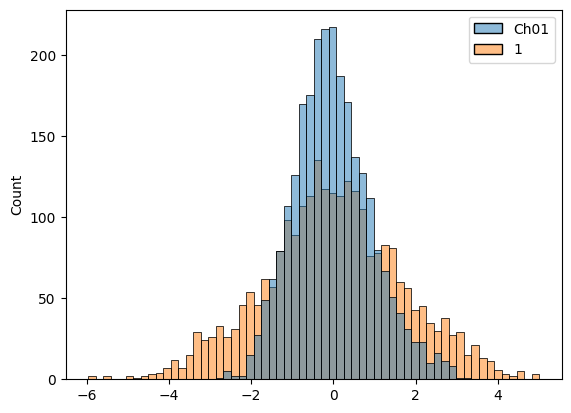

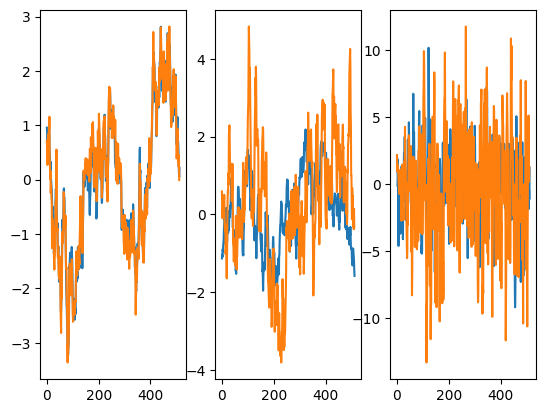

In [9]:
prob_times = model.get_win_times(len(data))
onset_idx = np.argmin(np.abs(prob_times-sz_start))//2
ndd = model(data)
mse = model.mse_df.to_numpy()
corr = model.corr_df.to_numpy()
XY = np.concatenate((mse.reshape(mse.shape[0],mse.shape[1],1),corr.reshape(corr.shape[0],corr.shape[1],1)),axis=2).transpose(1,0,2)
# XY = mse.reshape(mse.shape[0],mse.shape[1],1).transpose(1,0,2)
X = XY[:,:onset_idx,:]
Y = XY[:,onset_idx:,:]

mahalanobis = np.zeros(corr[:,:].shape)
for i in range(X.shape[0]):
    x = X[i,:,:].reshape(-1,X.shape[2])
    y = XY[i,:,:].reshape(-1,XY.shape[2])
    m = np.mean(x, axis=0)
    C = x - m
    _, R = np.linalg.qr(C) 
    ri = np.linalg.solve(R.T, (y - m).T)
    mahalanobis[:,i] = np.sum(ri * ri, axis=0) * (x.shape[0] - 1)

for mat in [mahalanobis,mse,corr]:
    plt.matshow(mat.T)
    # plt.colorbar()
    plt.axvline(x=onset_idx*2,color='r')
    plt.show()
ndd = model(data)
plt.matshow(ndd.T)
plt.axvline(x=onset_idx*2,color='r')
plt.show()

x = model.predict(data)
plot_iEEG_data(pd.DataFrame(x,columns=data.columns).loc[np.isnan(x).sum(axis=1)==0,:],fs=fs)
plot_iEEG_data(data,fs=fs)
plt.show()

sns.histplot((data['Ch01'][10*fs:20*fs],x[10*fs:20*fs,0]))
plt.show()
s = 5*fs
plt.subplot(1,3,1)
plt.plot(data.loc[s:s+512,['Ch01']].values)
plt.plot(x[s:s+512,0])
s = 15*fs
plt.subplot(1,3,2)
plt.plot(data.loc[s:s+512,['Ch01']].values)
plt.plot(x[s:s+512,0])
s = 20*fs
plt.subplot(1,3,3)
plt.plot(data.loc[s:s+512,['Ch01']].values)
plt.plot(x[s:s+512,0])
plt.show()


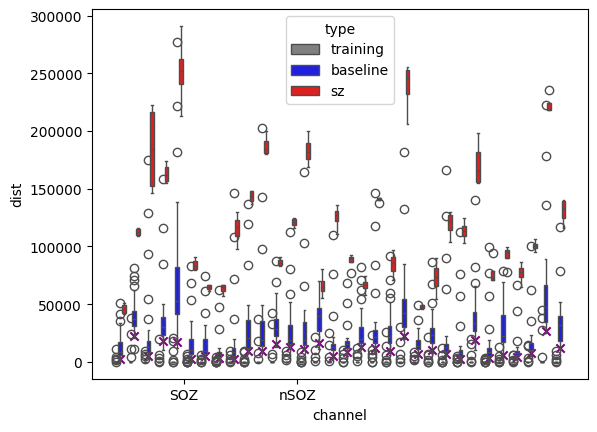

In [59]:
train_mask = (prob_times <= 10)
train_df = pd.DataFrame(ndd[train_mask],columns=data.columns)
gen_mask = (prob_times <= sz_start) & (prob_times > 10)
gen_df = pd.DataFrame(ndd[gen_mask],columns=data.columns)
sz_mask = (prob_times <= sz_start+1) & (prob_times > sz_start)
sz_df = pd.DataFrame(ndd[sz_mask],columns=data.columns)
train_df['type'] = 'training'
gen_df['type'] = 'baseline'
sz_df['type'] = 'sz'
df = pd.concat([train_df,gen_df,sz_df])
df = df.melt(id_vars=['type'],var_name='channel',value_name='dist')
sns.boxplot(data=df,x='channel',y='dist',hue='type',palette=['gray','blue','red'])
plt.scatter(list(range(gen_df.shape[1]-1)), gen_df.iloc[:,:-1].quantile(0.05),color='purple',marker='x')
plt.xticks([4.5,12.5],['SOZ','nSOZ'])
plt.show()

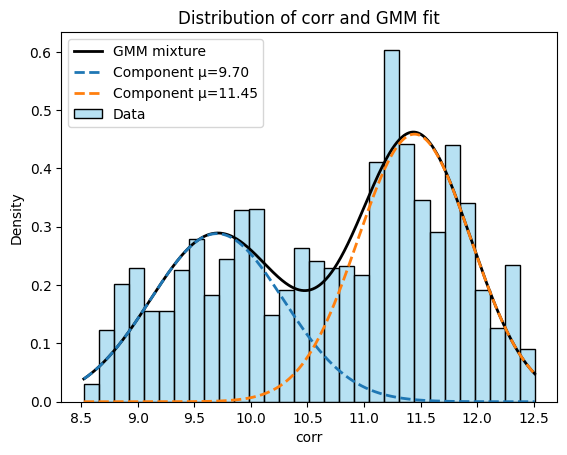

In [60]:
from sklearn.mixture import GaussianMixture
x = sc.ndimage.median_filter(np.log(ndd.loc[~train_mask,:].copy()),size=20,mode='nearest',axes=0)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(x.reshape(-1,1))

import numpy as np

# Plot the histogram of the data
sns.histplot(x.flatten(), bins=30, stat='density', color='skyblue', label='Data', alpha=0.6)

# Plot the estimated Gaussian components
x = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)  # Score for each x, repeated for 8 channels
pdf = np.exp(logprob)
plt.plot(x, pdf, color='black', lw=2, label='GMM mixture')

# Plot each component
means = gmm.means_.flatten()
covars = np.sqrt(gmm.covariances_).flatten()
weights = gmm.weights_.flatten()
for mean, covar, weight in zip(means, covars, weights):
    component_pdf = weight * (1/(np.sqrt(2*np.pi)*covar)) * np.exp(-0.5*((x-mean)/covar)**2)
    plt.plot(x, component_pdf, lw=2, linestyle='--', label=f'Component μ={mean:.2f}')

plt.legend()
plt.xlabel('corr')
plt.ylabel('Density')
plt.title('Distribution of corr and GMM fit')
plt.show()

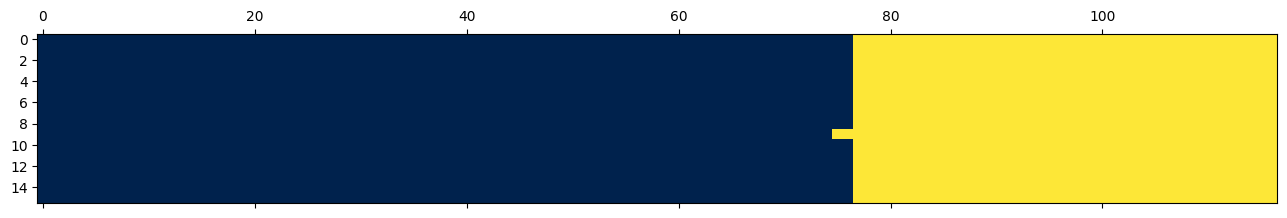

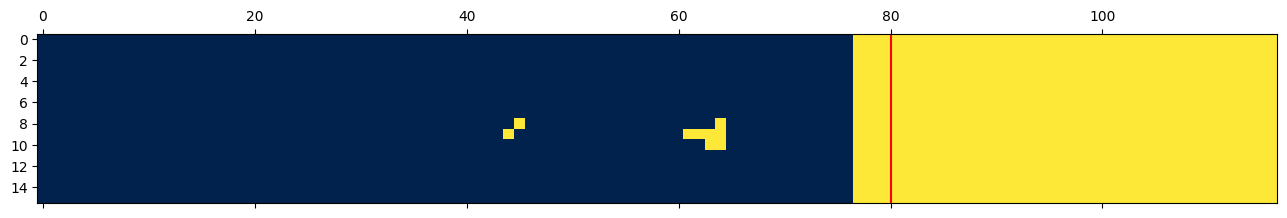

In [51]:
plt.matshow(sc.ndimage.median_filter(ndd,size=40,mode='nearest',axes=0).T>np.exp(6))
plt.matshow(ndd.T>np.exp(5.3))

plt.axvline(x=onset_idx*2,color='r')
plt.show()